In [1]:
import pandas as pd
import numpy as np
import os
from tool_Visualize import count_files, remove_same_image_folder, split_train_test
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import random
import shutil

In [15]:
image_path = r"D:\data\tomato_realife\test\images\Bacterial Spot\IMG_1128_JPG.rf.2b6c8bd27f4affcd740259c710285fa4.jpg"
image = Image.open(image_path)

image_np = np.array(image)

green_channel = image_np[:, :, 1]

threshold = 145
mask = green_channel > threshold

segmented_image_np = np.zeros_like(image_np)
segmented_image_np[mask] = image_np[mask]

segmented_image = Image.fromarray(segmented_image_np)
image_np = Image.fromarray(image_np)

# image_np.show()
segmented_image.show()

In [18]:
# Load the image using OpenCV
image_cv = cv2.imread(image_path)

# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image_cv, cv2.COLOR_BGR2HSV)

# Define the range for green color in HSV
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])

# Create a mask for the green color
mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Apply the mask to the image
segmented_image_cv = cv2.bitwise_and(image_cv, image_cv, mask=mask)

# Convert the result back to an image
segmented_image_cv_path = "strawberry"
cv2.imwrite(segmented_image_cv_path, segmented_image_cv)

segmented_image_cv_path

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:696: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'


In [20]:
count_files(r'D:\data\Potato Leaf Disease Dataset in Uncontrolled Environment\train')

      Category  File Count
0     Bacteria         456
1        Fungi         599
2      Healthy         161
3     Nematode          55
4         Pest         489
5  Phytopthora         278
6        Virus         426


In [8]:
# remove_same_image_folder(r"D:\data\tomato_realife\train\images")

['D:\\data\\tomato_realife\\train\\images\\IMG_0212_JPG.rf.51e464fbdd411d448fd79bb32b807bef.jpg', 'D:\\data\\tomato_realife\\train\\images\\IMG_0212_JPG.rf.72f9bdc6599adddf2dc541fb4f939b13.jpg', 'D:\\data\\tomato_realife\\train\\images\\IMG_0212_JPG.rf.f9feb4b8c032613cf639b801f7a934c2.jpg', 'D:\\data\\tomato_realife\\train\\images\\IMG_0213_JPG.rf.39d1e47fe401ff4f0ed7becec0fc997c.jpg', 'D:\\data\\tomato_realife\\train\\images\\IMG_0213_JPG.rf.6ae88337d39608b8566aa7a0a3c042df.jpg', 'D:\\data\\tomato_realife\\train\\images\\IMG_0213_JPG.rf.c3d06634ba033bc2aa45b4196177733f.jpg', 'D:\\data\\tomato_realife\\train\\images\\IMG_0214_JPG.rf.256ab89188a6a009f654161bcc04fc64.jpg', 'D:\\data\\tomato_realife\\train\\images\\IMG_0214_JPG.rf.4ed66c48b590e58096cb5bdd7007ef31.jpg', 'D:\\data\\tomato_realife\\train\\images\\IMG_0214_JPG.rf.ff901d83bb7227dd3800eed1eb0aa6dc.jpg', 'D:\\data\\tomato_realife\\train\\images\\IMG_0216_JPG.rf.2f2281def8c9e88325cf0bcfb3689634.jpg', 'D:\\data\\tomato_realife\\tr

In [2]:
split_train_test(r"D:\data\Potato Leaf Disease Dataset in Uncontrolled Environment", r'D:\data\Potato Leaf Disease Dataset in Uncontrolled Environment\train', r'D:\data\Potato Leaf Disease Dataset in Uncontrolled Environment\test', 0.2)

Đã chuyển dữ liệu thành công.


In [2]:
root_dir = r'D:\data\tomato_realife'

Image: IMG_0554_JPG.rf.123e05abb041babb491a02b436260cff.jpg


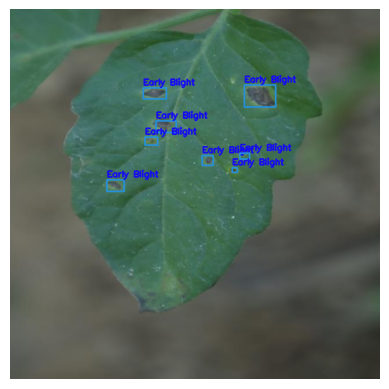

Image: IMG_0581_JPG.rf.303c1f0a2504708e64a37c20cf3e0d58.jpg


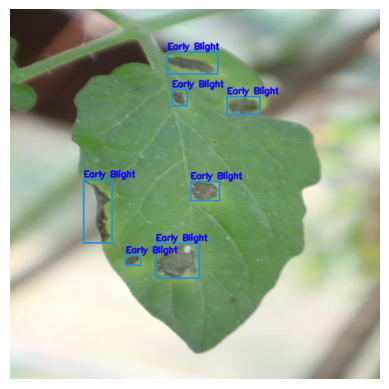

Image: IMG_0359_JPG.rf.e4fb9464647fd62372ad23e4e93acf58.jpg


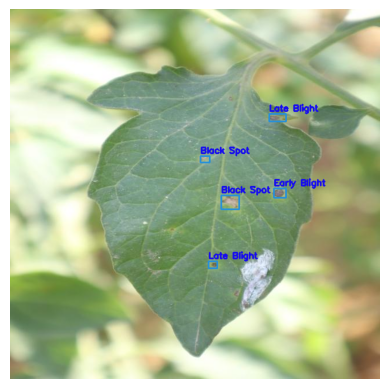

Image: IMG_0337_JPG.rf.c5ee563d8584973ee9fd339de59c0c8f.jpg


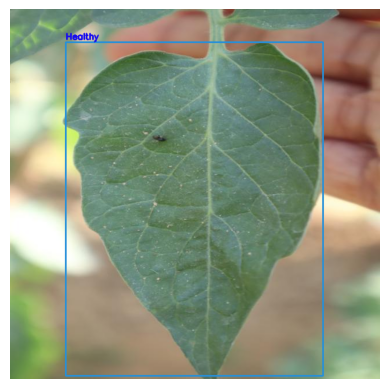

Image: IMG_1150_JPG.rf.b69556095575c09e135bd499d19e23de.jpg


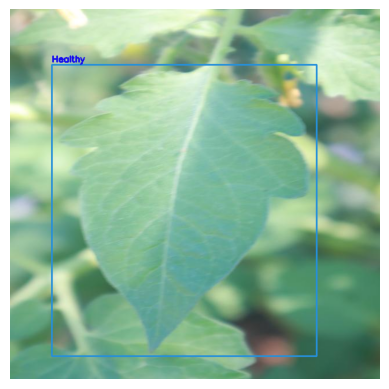

In [3]:
def visualize_bounding_boxes(image_path, annotation_path, class_labels):
    image = cv2.imread(image_path)
    try:
        annotations = pd.read_csv(annotation_path, delimiter=' ', header=None)
    except pd.errors.EmptyDataError:
        print(f'{annotation_path}, " is empty')
    
    for _, row in annotations.iterrows():
        class_label = row[0]
        class_label = class_labels[int(class_label)]
        x_center, y_center, width, height = row[1:].values
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (218, 144, 38), 2)
        cv2.putText(image, str(class_label), (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (239, 13, 23), 2)
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

images_dir = root_dir + '/test/images'
annot_dir = root_dir +  '/test/labels'

class_labels = ['Bacterial Spot', 'Early Blight', 'Healthy', 'Late Blight', 'Leaf Mold', 'Target Spot', 'Black Spot']

image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

random_images = random.sample(image_files, 5)

for image_file in random_images:
    image_path = os.path.join(images_dir, image_file)
    annotation_path = os.path.join(annot_dir, image_file.replace('.jpg', '.txt'))
    
    print("Image:", image_file)
    visualize_bounding_boxes(image_path, annotation_path, class_labels)

In [8]:
class_labels = ['Bacterial Spot', 'Early Blight', 'Healthy', 'Late Blight', 'Leaf Mold', 'Target Spot', 'Black Spot']

labels_dir = root_dir + '/train/labels'

annotation_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

class_counts = {label: 0 for label in class_labels}
empty_files = []

for annotation_file in annotation_files:
    annotation_path = os.path.join(labels_dir, annotation_file)
    try:
        annotations = pd.read_csv(annotation_path, delimiter=' ', header=None)
    except pd.errors.EmptyDataError:
        empty_files.append(annotation_file)
    
    for class_label in annotations[0]:
        class_counts[class_labels[class_label]] += 1

In [9]:
print("Label Distribution:")
for class_label, count in class_counts.items():
    print(f"{class_label}: {count} instances")

Label Distribution:
Bacterial Spot: 84 instances
Early Blight: 1090 instances
Healthy: 162 instances
Late Blight: 303 instances
Leaf Mold: 87 instances
Target Spot: 39 instances
Black Spot: 377 instances


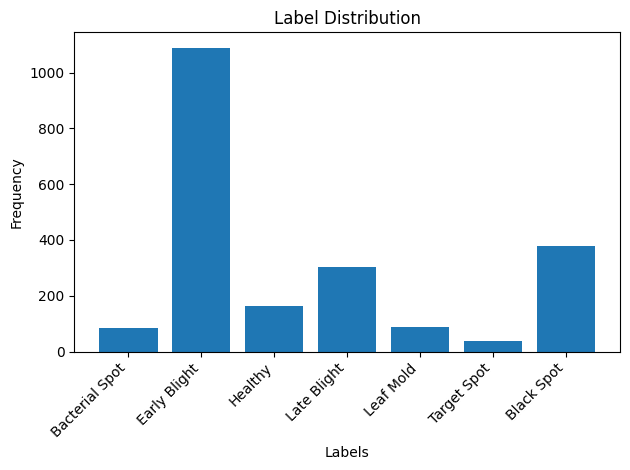

In [10]:
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
import os
import shutil

# Đường dẫn đến thư mục test, image và label
test_dir = r'D:/data/tomato_realife/train'
image_dir = os.path.join(test_dir, 'images')
label_dir = os.path.join(test_dir, 'labels')

# Ánh xạ các nhãn số sang tên nhãn
class_labels = ['Bacterial Spot', 'Early Blight', 'Healthy', 'Late Blight', 'Leaf Mold', 'Target Spot', 'Black Spot']

# Tạo các thư mục cho từng loại bệnh nếu chưa có
for label in class_labels:
    label_path = os.path.join(image_dir, label)
    os.makedirs(label_path, exist_ok=True)

# Duyệt qua các file label và di chuyển ảnh
for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):
        label_path = os.path.join(label_dir, label_file)
        
        with open(label_path, 'r') as f:
            label_data = f.readline().strip().split()
            if len(label_data) > 0:  # Kiểm tra nếu dòng không rỗng
                label_index = int(label_data[0])
                label_name = class_labels[label_index]
        
                img_file = label_file.replace('.txt', '.jpg')
                src_path = os.path.join(image_dir, img_file)
                dest_path = os.path.join(image_dir, label_name, img_file)
        
                # Kiểm tra xem file ảnh có tồn tại không
                if os.path.exists(src_path):
                    shutil.move(src_path, dest_path)
                else:
                    print(f"File {img_file} không tồn tại trong thư mục {image_dir}")
            else:
                print(f"File {label_file} trống hoặc không có dữ liệu hợp lệ.")

print("Hoàn thành việc phân loại ảnh.")


File IMG_0212_JPG.rf.51e464fbdd411d448fd79bb32b807bef.jpg không tồn tại trong thư mục D:/data/tomato_realife/train\images
File IMG_0212_JPG.rf.72f9bdc6599adddf2dc541fb4f939b13.jpg không tồn tại trong thư mục D:/data/tomato_realife/train\images
File IMG_0212_JPG.rf.f9feb4b8c032613cf639b801f7a934c2.jpg không tồn tại trong thư mục D:/data/tomato_realife/train\images
File IMG_0213_JPG.rf.39d1e47fe401ff4f0ed7becec0fc997c.txt trống hoặc không có dữ liệu hợp lệ.
File IMG_0213_JPG.rf.6ae88337d39608b8566aa7a0a3c042df.txt trống hoặc không có dữ liệu hợp lệ.
File IMG_0213_JPG.rf.c3d06634ba033bc2aa45b4196177733f.txt trống hoặc không có dữ liệu hợp lệ.
File IMG_0214_JPG.rf.256ab89188a6a009f654161bcc04fc64.txt trống hoặc không có dữ liệu hợp lệ.
File IMG_0214_JPG.rf.4ed66c48b590e58096cb5bdd7007ef31.txt trống hoặc không có dữ liệu hợp lệ.
File IMG_0214_JPG.rf.ff901d83bb7227dd3800eed1eb0aa6dc.txt trống hoặc không có dữ liệu hợp lệ.
File IMG_0330_JPG.rf.745cebf4e282b04cb36dd50cdad81f94.txt trống hoặc k

In [4]:
count_files(r"D:\data\Potato Leaf Disease Dataset in Uncontrolled Environment\test")

      Category  File Count
0     Bacteria         113
1        Fungi         149
2      Healthy          40
3     Nematode          13
4         Pest         122
5  Phytopthora          69
6        Virus         106


In [15]:
img_path = r"D:\data\Potato Leaf Disease Dataset in Uncontrolled Environment\Potato Leaf Disease Dataset in Uncontrolled Environment\Bacteria\20230815_111318.jpg"
img = Image.open(img_path)

# Resize the image to 224x224
img_resized = img.resize((224, 224))

img_resized.show()

In [2]:
remove_same_image_folder('strawberry')

['strawberry\\1 - Copy (2) - Copy - Copy - Copy.JPG', 'strawberry\\1 - Copy (2) - Copy - Copy.JPG', 'strawberry\\1 - Copy (3) - Copy - Copy - Copy.JPG', 'strawberry\\1 - Copy (4) - Copy - Copy - Copy.JPG', 'strawberry\\33028adc-9dc2-4ac3-a7b9-7094200264f6___GCREC_Bact.Sp 3162 - Copy (2).JPG', 'strawberry\\33028adc-9dc2-4ac3-a7b9-7094200264f6___GCREC_Bact.Sp 3162 - Copy.JPG', 'strawberry\\33028adc-9dc2-4ac3-a7b9-7094200264f6___GCREC_Bact.Sp 3162.JPG', 'strawberry\\34385d7a-a724-4577-898b-dc9b9deb8ed9___GCREC_Bact.Sp 6098 - Copy (2) - Copy - Copy.JPG', 'strawberry\\34385d7a-a724-4577-898b-dc9b9deb8ed9___GCREC_Bact.Sp 6098 - Copy (2) - Copy.JPG', 'strawberry\\34385d7a-a724-4577-898b-dc9b9deb8ed9___GCREC_Bact.Sp 6098 - Copy (3) - Copy - Copy.JPG', 'strawberry\\34385d7a-a724-4577-898b-dc9b9deb8ed9___GCREC_Bact.Sp 6098 - Copy (4) - Copy - Copy.JPG', 'strawberry\\34385d7a-a724-4577-898b-dc9b9deb8ed9___GCREC_Bact.Sp 6098 - Copy (5) - Copy - Copy.JPG', 'strawberry\\35797a1e-c933-4ae3-817f-abc07

In [8]:
count_files(r"D:\data\Potato Leaf Disease Dataset in Uncontrolled Environment\Potato Leaf Disease Dataset in Uncontrolled Environment")

      Category  File Count
0     Bacteria         569
1        Fungi         748
2      Healthy         201
3     Nematode          68
4         Pest         611
5  Phytopthora         347
6        Virus         532


In [66]:
count_files("potato/val")

[('Potato___Early_blight', 200),
 ('Potato___healthy', 31),
 ('Potato___Late_blight', 200)]

In [28]:
train_path = 'tomato/train'
val_path = 'tomato/val'
test_path = 'tomato/test'
train_aug_path = "tomato/train_aug"

In [45]:
def calculate_average_brightness(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        return np.mean(image)
    else:
        return None

def get_random_images(directory, num_images=2000):
    all_images = []
    
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            for file_name in os.listdir(category_path):
                file_path = os.path.join(category_path, file_name)
                # Kiểm tra định dạng file hình ảnh
                if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                    all_images.append(file_path)
    
    # Chọn ngẫu nhiên 2000 tấm hình từ danh sách
    random_images = random.sample(all_images, min(num_images, len(all_images)))
    return random_images

def get_average_brightness_distribution(image_paths):
    brightness_values = []
    for image_path in image_paths:
        brightness = calculate_average_brightness(image_path)
        if brightness is not None:
            brightness_values.append(brightness)
    return brightness_values

In [65]:
random_images = get_random_images(train_aug_path, num_images=5000)

# Tính độ sáng trung bình của các tấm hình đã chọn
train_aug_brightness = get_average_brightness_distribution(random_images)


In [30]:
test_brightness = get_average_brightness_distribution(test_path)
val_brightness = get_average_brightness_distribution(val_path)


C:\Users\namtr\AppData\Local\Temp\ipykernel_9576\3710195546.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_aug_brightness, shade=True, label='train', color='blue')
C:\Users\namtr\AppData\Local\Temp\ipykernel_9576\3710195546.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(val_brightness, shade=True, label='val', color='orange')


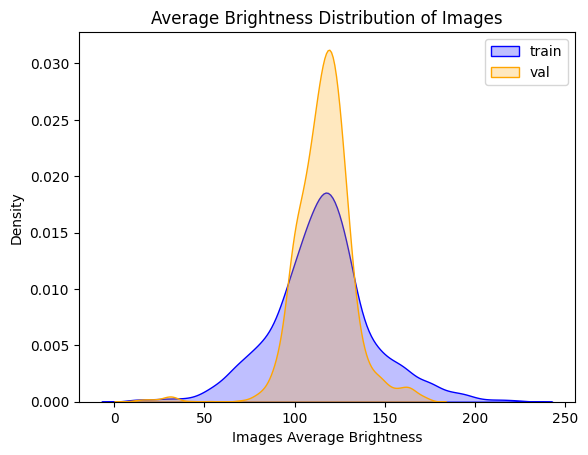

In [66]:
sns.kdeplot(train_aug_brightness, shade=True, label='train', color='blue')
sns.kdeplot(val_brightness, shade=True, label='val', color='orange')
plt.title('Average Brightness Distribution of Images')
plt.xlabel('Images Average Brightness')
plt.ylabel('Density')
plt.legend()
plt.show()

C:\Users\namtr\AppData\Local\Temp\ipykernel_9576\1240414518.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_aug_brightness, shade=True, label='train', color='blue')
C:\Users\namtr\AppData\Local\Temp\ipykernel_9576\1240414518.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_brightness, shade=True, label='test', color='orange')


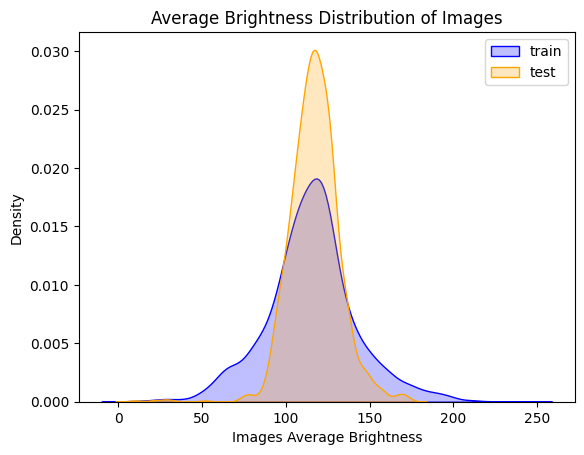

In [61]:
sns.kdeplot(train_aug_brightness, shade=True, label='train', color='blue')
sns.kdeplot(test_brightness, shade=True, label='test', color='orange')
plt.title('Average Brightness Distribution of Images')
plt.xlabel('Images Average Brightness')
plt.ylabel('Density')
plt.legend()
plt.show()

In [67]:
import cv2
import os
import numpy as np

def calculate_average_brightness(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        return np.mean(image)
    else:
        return None

def analyze_test_data(directory):
    total_images = 0
    brightness_values = []
    category_counts = {}
    
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            category_counts[category] = 0
            for file_name in os.listdir(category_path):
                file_path = os.path.join(category_path, file_name)
                if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                    total_images += 1
                    category_counts[category] += 1
                    brightness = calculate_average_brightness(file_path)
                    if brightness is not None:
                        brightness_values.append(brightness)
    
    average_brightness = np.mean(brightness_values) if brightness_values else 0
    return total_images, category_counts, average_brightness

# Đường dẫn tới thư mục test
test_folder_path = "tomato/test"

# Phân tích dữ liệu test
total_images, category_counts, average_brightness = analyze_test_data(test_folder_path)

# Hiển thị thông tin
print(f"Total images: {total_images}")
print(f"Category counts: {category_counts}")
print(f"Average brightness: {average_brightness}")


Total images: 1000
Category counts: {'Tomato___Bacterial_spot': 100, 'Tomato___Early_blight': 100, 'Tomato___healthy': 100, 'Tomato___Late_blight': 100, 'Tomato___Leaf_Mold': 100, 'Tomato___Septoria_leaf_spot': 100, 'Tomato___Spider_mites Two-spotted_spider_mite': 100, 'Tomato___Target_Spot': 100, 'Tomato___Tomato_mosaic_virus': 100, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 100}
Average brightness: 116.9555577999208


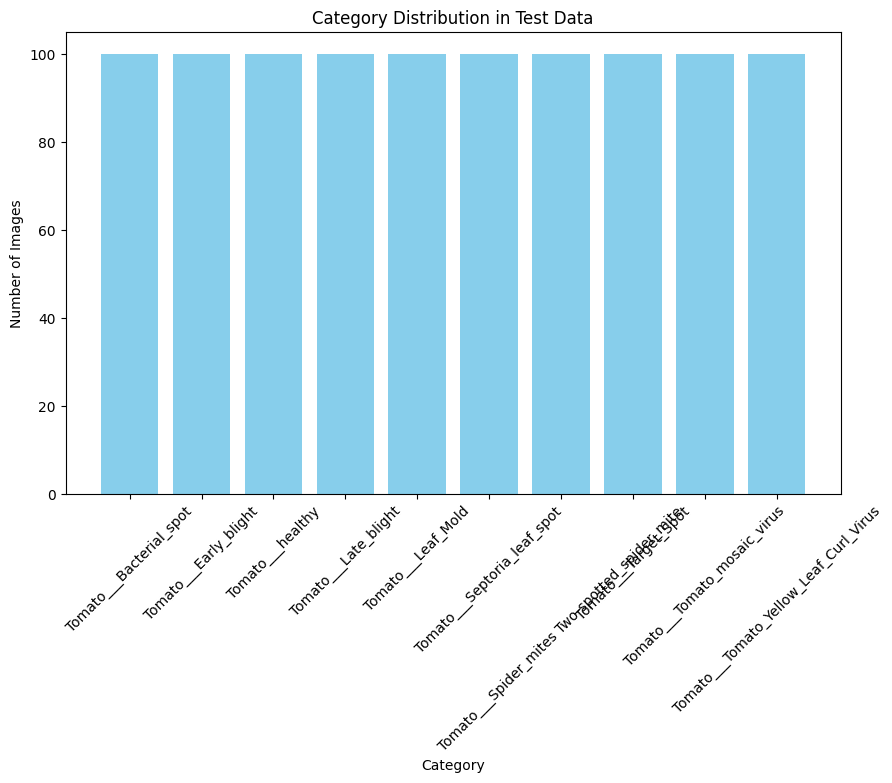

In [76]:
def plot_category_distribution(category_counts):
    categories = list(category_counts.keys())
    counts = list(category_counts.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color='skyblue')
    plt.xlabel('Category')
    plt.ylabel('Number of Images')
    plt.title('Category Distribution in Test Data')
    plt.xticks(rotation=45)
    plt.show()

# Sử dụng hàm để vẽ biểu đồ
plot_category_distribution(category_counts)

In [73]:

def calculate_average_brightness(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        return np.mean(image)
    else:
        return None

def analyze_test_data(directory):
    total_images = 0
    brightness_values = []
    category_counts = {}
    
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            category_counts[category] = 0
            for file_name in os.listdir(category_path):
                file_path = os.path.join(category_path, file_name)
                if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                    total_images += 1
                    category_counts[category] += 1
                    brightness = calculate_average_brightness(file_path)
                    if brightness is not None:
                        brightness_values.append(brightness)
    
    average_brightness = np.mean(brightness_values) if brightness_values else 0
    return total_images, category_counts, average_brightness, brightness_values

# Đường dẫn tới thư mục test
test_folder_path = "tomato/test"

# Phân tích dữ liệu test
total_images, category_counts, average_brightness, brightness_distribution = analyze_test_data(test_folder_path)

# Hiển thị thông tin
total_images, category_counts, average_brightness, brightness_distribution[:10]  # Display first 10 brightness values for brevity


(1000,
 {'Tomato___Bacterial_spot': 100,
  'Tomato___Early_blight': 100,
  'Tomato___healthy': 100,
  'Tomato___Late_blight': 100,
  'Tomato___Leaf_Mold': 100,
  'Tomato___Septoria_leaf_spot': 100,
  'Tomato___Spider_mites Two-spotted_spider_mite': 100,
  'Tomato___Target_Spot': 100,
  'Tomato___Tomato_mosaic_virus': 100,
  'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 100},
 116.9555577999208,
 [96.38336181640625,
  103.89324951171875,
  101.09144592285156,
  104.99736022949219,
  107.30963134765625,
  105.0289306640625,
  110.51437377929688,
  99.09361267089844,
  91.33714294433594,
  102.85258483886719])

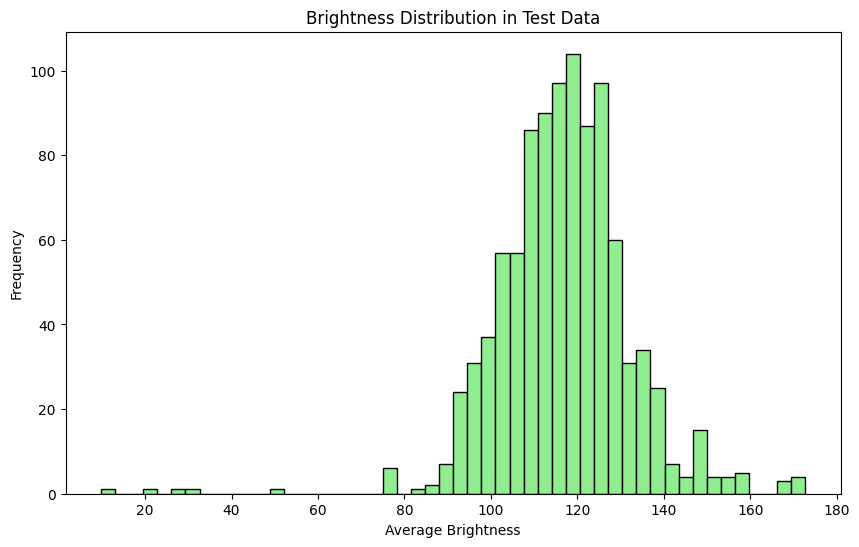

C:\Users\namtr\AppData\Local\Temp\ipykernel_9576\2566576254.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(brightness_values, shade=True, color='lightgreen')


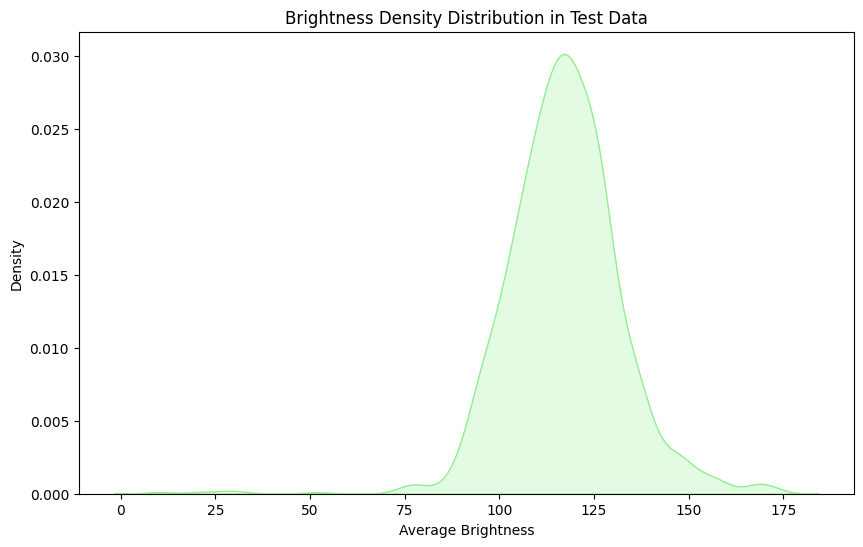

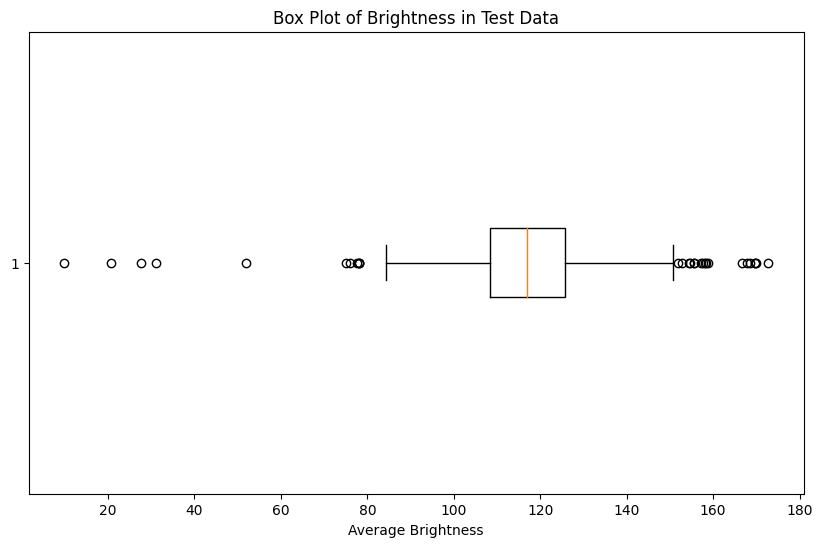

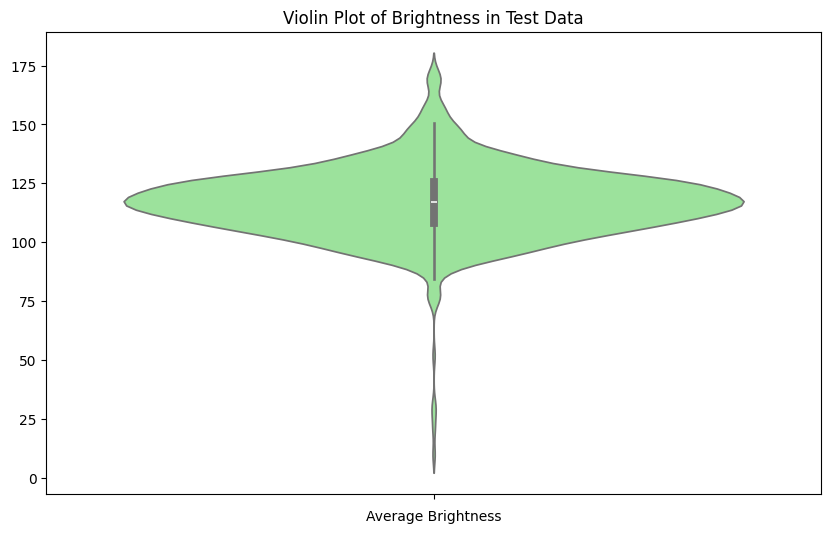

In [75]:
def plot_brightness_distribution(brightness_values, bins=30):
    plt.figure(figsize=(10, 6))
    plt.hist(brightness_values, bins=bins, color='lightgreen', edgecolor='black')
    plt.xlabel('Average Brightness')
    plt.ylabel('Frequency')
    plt.title('Brightness Distribution in Test Data')
    plt.show()

def plot_brightness_density(brightness_values):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(brightness_values, shade=True, color='lightgreen')
    plt.xlabel('Average Brightness')
    plt.ylabel('Density')
    plt.title('Brightness Density Distribution in Test Data')
    plt.show()

def plot_brightness_boxplot(brightness_values):
    plt.figure(figsize=(10, 6))
    plt.boxplot(brightness_values, vert=False)
    plt.xlabel('Average Brightness')
    plt.title('Box Plot of Brightness in Test Data')
    plt.show()

def plot_brightness_violinplot(brightness_values):
    plt.figure(figsize=(10, 6))
    sns.violinplot(brightness_values, color='lightgreen')
    plt.xlabel('Average Brightness')
    plt.title('Violin Plot of Brightness in Test Data')
    plt.show()

# Gọi hàm để vẽ các biểu đồ
plot_brightness_distribution(brightness_distribution, bins=50)
plot_brightness_density(brightness_distribution)
plot_brightness_boxplot(brightness_distribution)
plot_brightness_violinplot(brightness_distribution)